In [19]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from numerik import lu

In [20]:
# newton algorythm
def newton(f, df, x, tol = 1e-14, maxStep = 100) :
    step = 0
    error = np.linalg.norm(f(x))
    while error > tol and step < maxStep:
        print(step, x, error)
        x += lu.linsolve(df(x), -f(x))
        error = np.linalg.norm(f(x))        
        step += 1
        
    return x

In [21]:
# specific robot case
def get_position(a, b, l1, l2):
    x = l1 * np.cos(a) + l2 * np.cos(a+b)
    y = l1 * np.sin(a) + l2 * np.sin(a+b)
    return np.array([x, y])

def get_mid_joint_position(a, l1):
    x = l1 * np.cos(a)
    y = l1 * np.sin(a)
    return np.array([x, y])

def fitness_function(a, b, l1, l2, p): # function that needs to be optimized to zero
    return get_position(a, b, l1, l2) - p

def fitness_function_jacobi(a, b, l1, l2):
    return np.array([[-l1 * np.sin(a) - l2 * np.sin(a+b), - l2 * np.sin(a+b)],
                     [l1 * np.cos(a) + l2 * np.cos(a+b), l2 * np.cos(a+b)]])


def get_angles(x, y, l1, l2, x0 = np.array([1., 1.])):# 0,0 does not converge
    f = lambda a: fitness_function(*a, l1, l2, [x, y])
    df = lambda a: fitness_function_jacobi(*a, l1, l2)

    p = newton(f, df, x0) 
    p = np.mod(p, np.pi*2) # constrain function output to one full rotation
    return p


0 [1. 1.] 9.47249602479614
1 [-1.70143454 14.93078045] 6.61436356465341
2 [-6.40171074 13.46852626] 9.440154264364754
3 [-12.33474963  28.31441229] 7.921072078645272
4 [-101.64387572  -57.45667625] 5.916741755416793
5 [-104.46439398  -55.06827978] 6.439516656655468
6 [-101.52370276  -55.86440226] 7.666091639809053
7 [-106.10818725  -49.19283624] 9.634725167375233
8 [-109.41873692  -35.03775681] 5.881116545431042
9 [-114.29099075  -42.59203876] 7.49998921895986
10 [-117.97053944  -39.55058844] 9.033525257544529
11 [-116.49786392  -48.78613641] 5.3224113234958
12 [-113.87196235  -52.87990445] 6.678451586883187
13 [-118.19670328  -50.9641344 ] 9.881360309719906
14 [-110.97781001  -72.61577061] 7.067576452006764
15 [-104.09166891  -71.7580569 ] 7.21935830584085
16 [-99.25599146 -73.64339323] 8.39093463758035
17 [-97.33505117 -67.36848274] 5.078214960230482
18 [-95.77213654 -72.42415923] 6.56815991582604
19 [-109.55166802  -81.12494792] 4.26825786719889
20 [-105.51459467  -92.19373919] 8.11

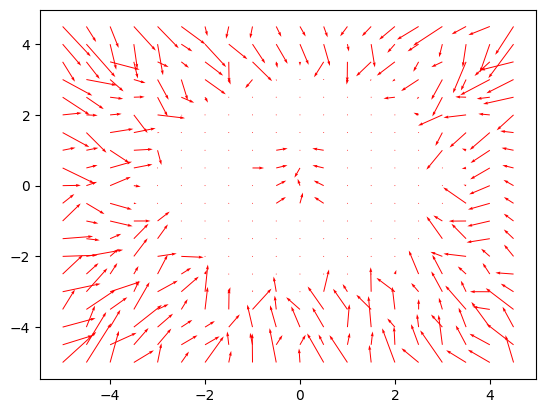

In [22]:
# creating inverse kinematic error gradient field
l1 = 2
l2 = 1

xys = np.mgrid[-5:5:0.5, -5:5:0.5].reshape(2,-1).T
for xy in xys:
    angles = get_angles(*xy, l1, l2)
    positions = get_position(*angles, l1, l2)
    error = xy - positions
    plt.quiver(*xy, *-error, color=['r','b','g'], scale=100, width=0.002)

plt.show()

In [23]:
# define functions for trajectory and for printing robot on plot
def trajectory(t):
    x = -2. + t * 1./(17**(1/2)) * 1
    y = 1. + t * 1./(17**(1/2)) * -4
    return np.array([x, y]).T

def plot_robot(a, b, l1, l2):
    x1 = [0,0]
    x2 = get_mid_joint_position(a, l1)
    x3 = get_position(a, b, l1, l2)
    p = np.array([x1, x2, x3])
    plt.plot(p[:,0], p[:,1], "k-o")

previous_angles = np.array([1., 1.])

@interact(t=(-2, 5, 0.01))
def plot_position(t):
    global previous_angles  # Add this line
    xy = trajectory(t)
    previous_angles = get_angles(*xy, l1, l2, previous_angles)
    
    # plot robot with angles
    plot_robot(*previous_angles, l1, l2)
    print(previous_angles)

    # plot commanded position
    plt.plot(xy[0], xy[1],'ro') 

    # plot trajectory
    ts = np.linspace(0, 4, 100)
    xys = trajectory(ts)
    plt.plot(xys[:,0], xys[:,1], "r")

    plt.xlim([4,-4])
    plt.ylim([4,-4])
    plt.show()


interactive(children=(FloatSlider(value=1.0, description='t', max=5.0, min=-2.0, step=0.01), Output()), _dom_c…